In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

##Import any other packages you may need here
from PIL import Image

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)

## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
3919,00019336_000.png,Infiltration,0,19336,030Y,F,PA,2990,2638,0.143,0.143
817,00004338_002.png,Edema,2,4338,050Y,M,AP,2500,2048,0.171,0.171
5046,00026810_023.png,Infiltration,23,26810,055Y,M,AP,3056,2544,0.139,0.139


In [3]:
## EDA
# Todo
all_xray_df.head(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN


In [4]:
# removing data showing >100 for age:
data = all_xray_df[all_xray_df['Patient Age']<=100]
findings=[]

for f in data["Finding Labels"].unique():
    for i in f.split('|'):
        if i not in findings:
            findings.append(i)
            data[i]=0
findings.remove('No Finding')

for c_label in findings:
    data[c_label] = data['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)

data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


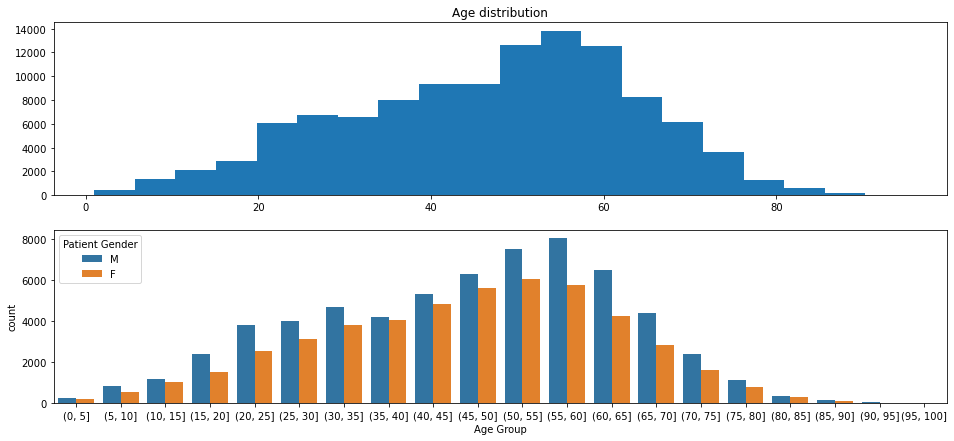

In [5]:
## Age histogram
plt.figure(figsize=(16,7))

plt.subplot(2,1,1)
age = data['Patient Age'].values
plt.hist(age, bins=20)
plt.title("Age distribution")

plt.subplot(2,1,2)
age_bins = np.arange(0, 101, 5)
data["Age Group"] = pd.cut(data["Patient Age"], bins=age_bins)
sns.countplot(x='Age Group', hue="Patient Gender", data=data)#, bins=20)
# all_xray_df['Patient Age'].plot(kind='bar')

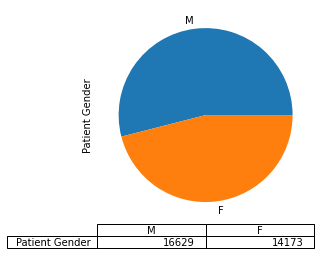

In [6]:
## gender
data.groupby(by='Patient ID')['Patient Gender'].first().value_counts().plot(kind='pie', table=True)

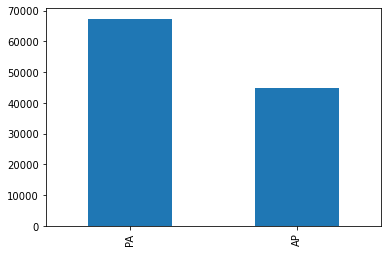

In [7]:
## position
data['View Position'].value_counts().plot(kind = 'bar')

Number of pneumonia cases: 1008.0
Number of non-pneumonia cases: 33970.0


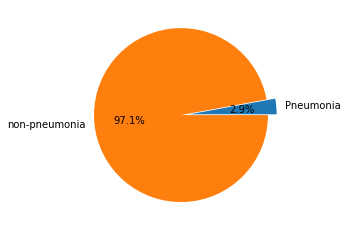

In [8]:
## Pneumonia vs non-pneumonia
pn = data.groupby(by='Patient ID')['Pneumonia'].max().sum()
total_cases = data.groupby(by='Patient ID')[findings].max().sum(axis=1).sum()
print(f'Number of pneumonia cases: {pn}\nNumber of non-pneumonia cases: {total_cases-pn}')
plt.pie([pn, total_cases-pn], [.1, 0], labels=['Pneumonia', 'non-pneumonia'],
       autopct='%.1f%%')
plt.show()

Text(0.5, 1.0, 'Patients with Pneumonia')

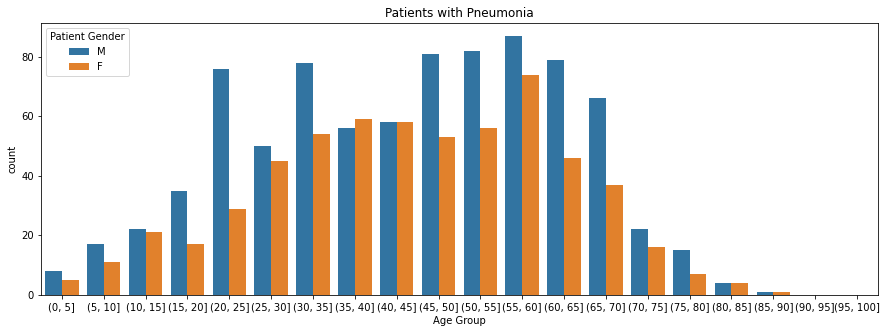

In [9]:
## Pneumonia and gender
df = data[data.Pneumonia==1][["Patient Gender", "Age Group"]]
plt.figure(figsize=(15,5))
sns.countplot(x="Age Group", hue='Patient Gender', data=df)
plt.title("Patients with Pneumonia")

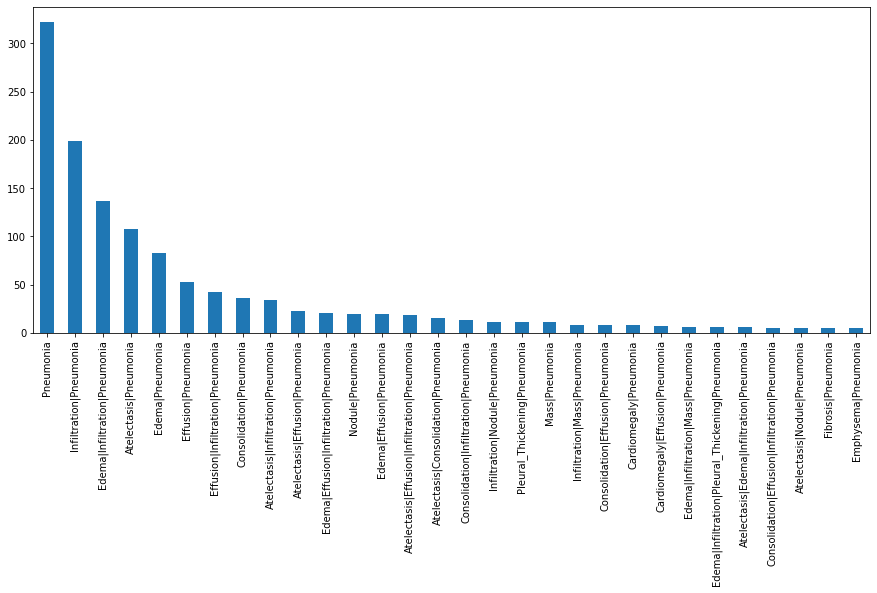

In [10]:
## pnumonia comorbid
plt.figure(figsize=(15,6))
data_pn=data[data['Pneumonia']==1]
data_pn['Finding Labels'].value_counts()[0:30].plot(kind='bar')

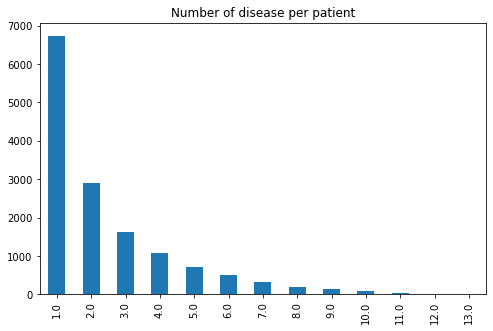

In [11]:
## Number of disease per patient
# 'No Finding' label has already been removed from findings list
dpp = data.groupby(by='Patient ID')[findings].max().sum(axis=1)
dpp[dpp!=0].value_counts().plot(kind='bar', title='Number of disease per patient', figsize=(8,5))
plt.show()

In [12]:
## Pixel-level assessments
data_sample_paths = {os.path.basename(x): x for x       
                     in glob(os.path.join('/data','images*', '*', 
                     '*.png'))}
sample_df['path'] = sample_df['Image Index'].map(data_sample_paths.get)

for c_label in findings:
    sample_df[c_label] = sample_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)

sample_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [80]:
def plotter(image_paths, title=None):
    fig=plt.figure(figsize=(16,4))
    fig.text(0.07,.5, title, {'fontsize': 18, 'ha':'center', 'va':'center', 'rotation': 90})
    fig.text(.3,.95, 'Sample 1', {'fontsize': 14, 'ha':'center', 'va':'center'})
    fig.text(.7,.95, 'Sample 2', {'fontsize': 14, 'ha':'center', 'va':'center'})
    
    for i, file in enumerate(image_paths):
        img = Image.open(file)
        plt.subplot(1,4,2*i+1)
        plt.hist(img.getdata(), bins=255)
        plt.ylim((0,15000))
        
        plt.subplot(1,4,2*i+2)
        plt.imshow(img, cmap='bone')
        
    plt.subplots_adjust(wspace=.3)

    plt.show()

For better comparison the intensity is capped at 14000. As can be seen, although mostly there are noticeable differences among the intensity histogram of diseases, some similar intensity patterns can still be found among different diseases. Therefore, this could not be a good feature to distinguish the type of the disease. Moreover, some patients have a mixture of different disease which makes it even more complicated.

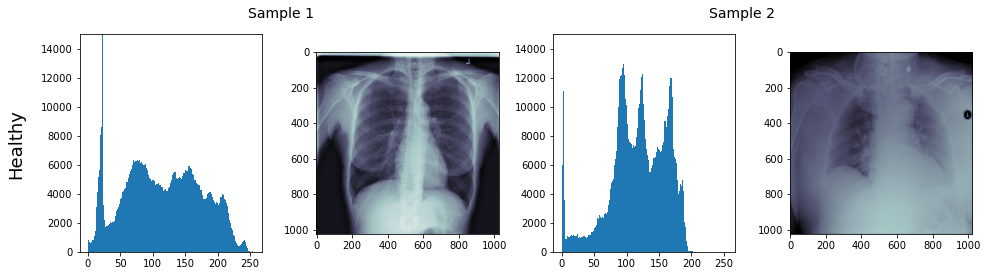

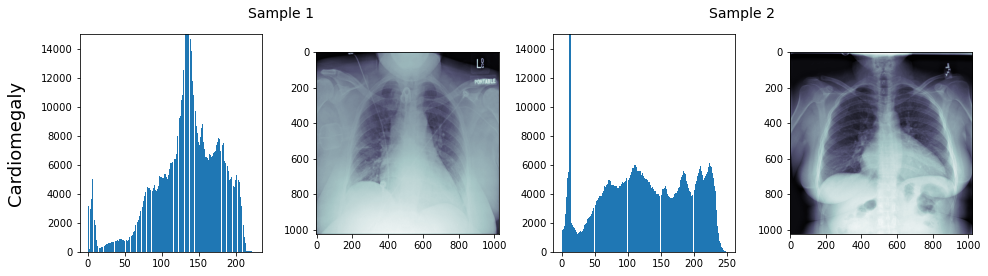

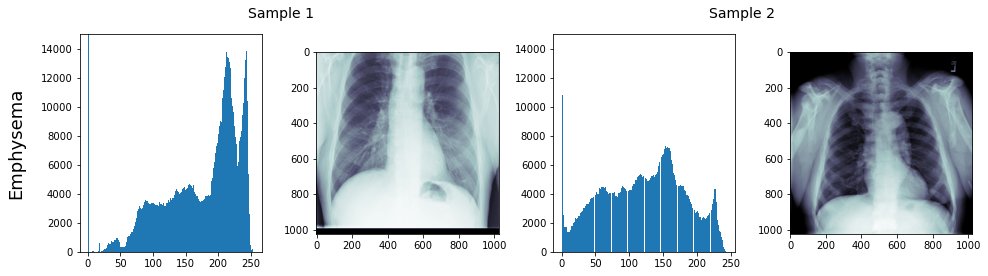

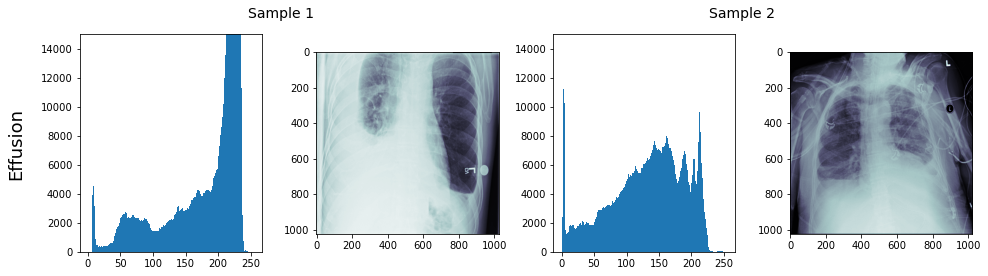

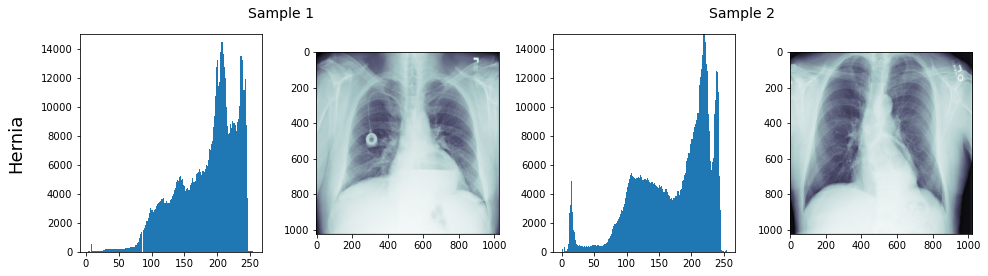

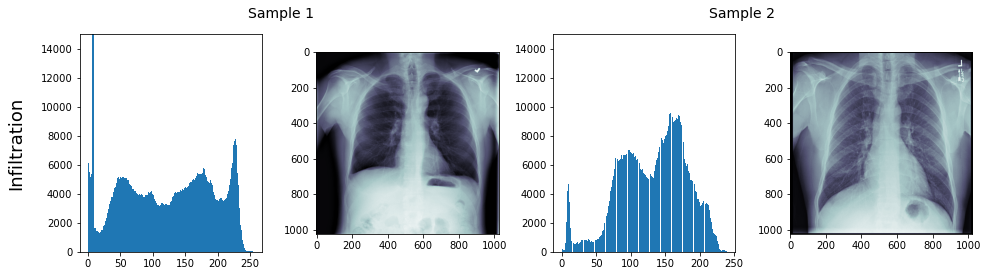

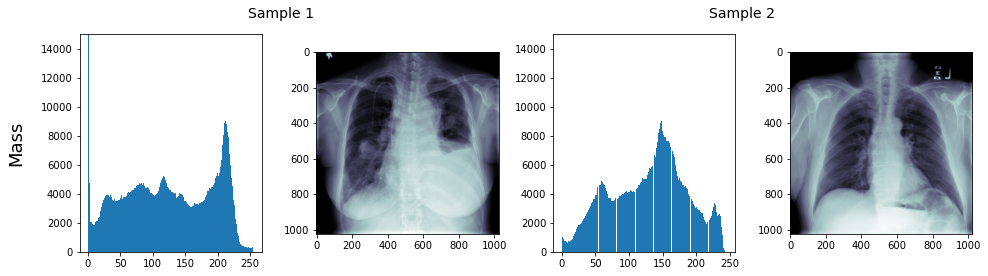

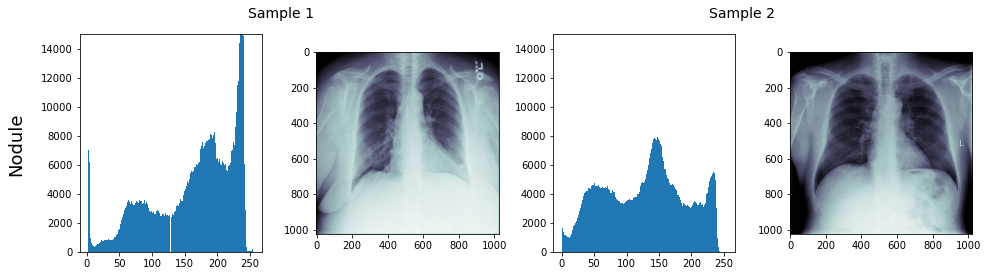

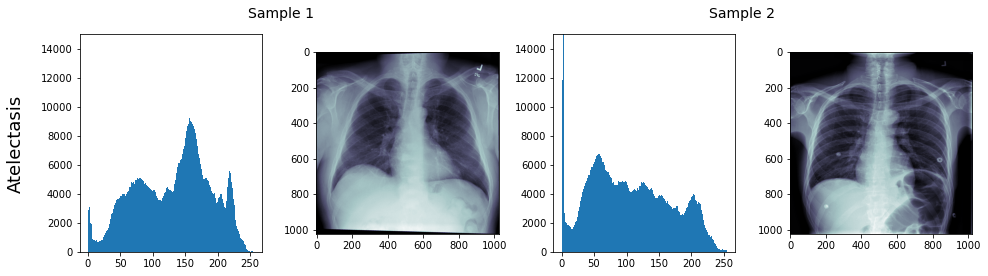

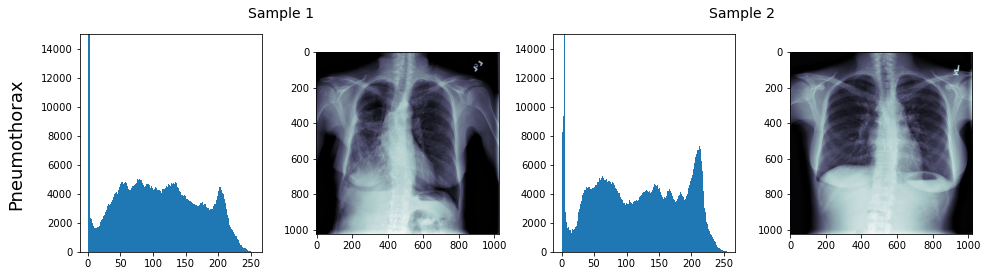

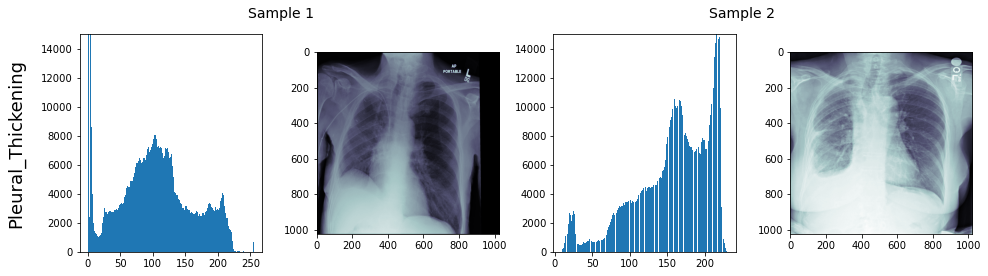

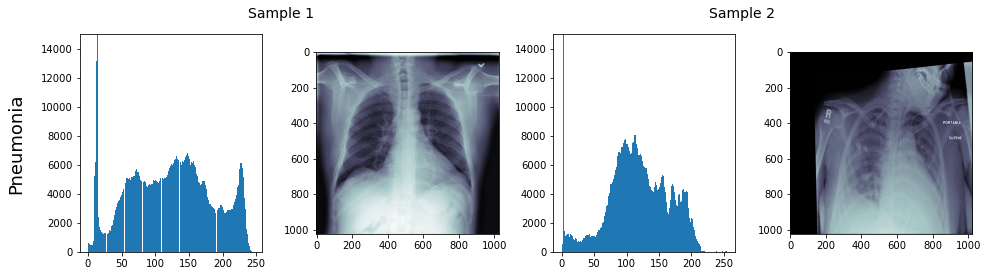

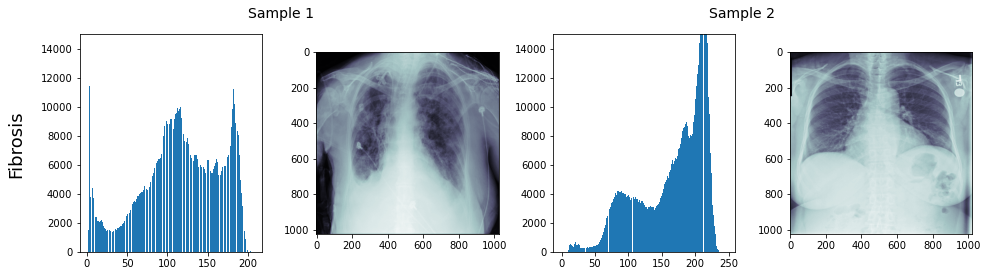

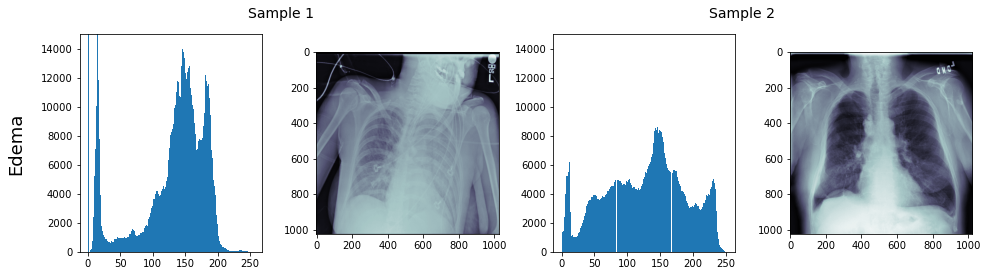

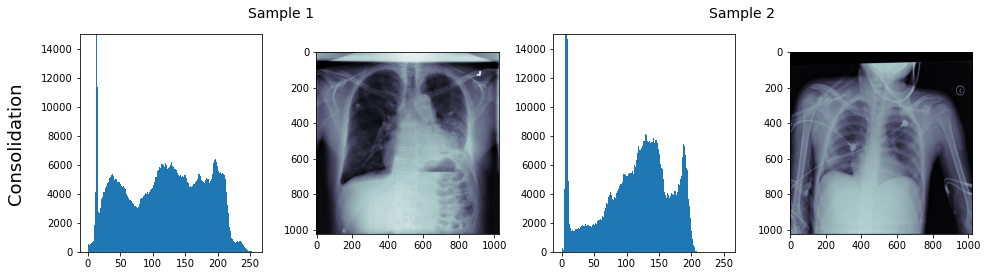

In [82]:
files=sample_df[sample_df['Finding Labels']=='No Finding'].sample(2)['path'].values
plotter(files, 'Healthy')

single_disease =sample_df[sample_df[findings].sum(axis=1)==1]
for case in findings:
    files = single_disease[single_disease[case]==1].sample(2)['path'].values
    plotter(files, case)
    